orig data shape: (1797, 8, 8)
(1797, 64)


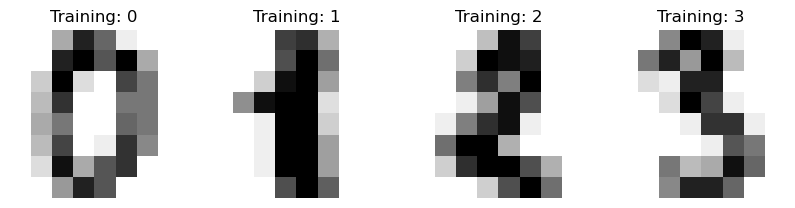

In [13]:
# -*- coding: utf-8 -*-
"""
Created on Sun Feb  5 13:44:31 2023

@author: vidura
"""

import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

import numpy as np

#%%
digits = datasets.load_digits()
print(f'orig data shape: {digits.images.shape}')

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
    
#%%

# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1)) ## new size (64,)

print(data.shape)

In [14]:
#%%
#### Random project data from 64 to dimension d

d      = 1000
n_feat = data.shape[1]

print(f'Dimension : {d}')
print(f'Num of features: {n_feat}')

np.random.seed(4) ## 4

rnd_project = 2 * np.pi * np.random.rand(n_feat, d) # uniform andom angles between [0,2pi]

Dimension : 1000
Num of features: 64


In [15]:
rnd_project.shape

(64, 1000)

In [16]:
rnd_project = 1 * np.exp(1j * rnd_project).real # create a phasor vector

In [17]:
### Or read from the file
import pickle
infile1 = open("rnd_project",'rb')
rnd_project = pickle.load(infile1)
infile1.close()


print(rnd_project.shape)
TR_D = np.matmul(data,rnd_project)

(64, 1000)


In [18]:
TR_D.shape

(1797, 1000)

In [19]:
TR_D = np.fft.fft(TR_D)

In [20]:
TR_D.shape

(1797, 1000)

In [21]:
## Normalize each element
# for i in range(len(TR_D)):
#     for j in range(len(TR_D[i])):
#         TR_D[i][j] = TR_D[i][j] / abs(TR_D[i][j] )

#%%

In [22]:
TR_D = TR_D / np.linalg.norm(TR_D, axis=1, keepdims=True)

In [23]:
TR_D

array([[ 0.00967601+0.00000000e+00j,  0.02109331+5.28510211e-03j,
         0.01769014-2.89238621e-02j, ..., -0.04117996-1.45123750e-03j,
         0.01769014+2.89238621e-02j,  0.02109331-5.28510211e-03j],
       [ 0.05304545+0.00000000e+00j,  0.00997184+6.71076100e-03j,
         0.005481  -2.02219682e-02j, ..., -0.01704446+3.41757226e-03j,
         0.005481  +2.02219682e-02j,  0.00997184-6.71076100e-03j],
       [ 0.05823445+0.00000000e+00j,  0.01016806+1.69331078e-02j,
         0.00924384-1.30262804e-02j, ..., -0.03046577-1.28799199e-02j,
         0.00924384+1.30262804e-02j,  0.01016806-1.69331078e-02j],
       ...,
       [ 0.03947224+0.00000000e+00j,  0.01254602-3.64423578e-05j,
         0.00832279-1.06719390e-02j, ..., -0.03076215+1.22466030e-02j,
         0.00832279+1.06719390e-02j,  0.01254602+3.64423578e-05j],
       [ 0.03170788+0.00000000e+00j,  0.01970252+1.96618649e-02j,
         0.00385882-3.59354480e-02j, ..., -0.04512312+8.99024995e-04j,
         0.00385882+3.59354480e-02j

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    TR_D, digits.target, test_size=0.25, shuffle=True)


#%%

In [25]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
import math, cmath

class hdv:
    dim=0
    def __init__(self, dim=0):
        self.dim = dim
        
    def get_rv(self):
        pass
    
    def bind(self, v1, v2):
        pass
    
    def bundle(self, arr_v):
        pass
    
    def similarity(self, v1, v2):
        pass
    
    def set_dim(self, dim):
        self.dim = dim
        
class FHRR(hdv):
    upper = math.pi
    lower = -math.pi
    def get_rv(self):
        angles = np.random.uniform(self.lower, self.upper, self.dim)
        elems = [ cmath.exp(1j*theta) for theta in angles ]
        return np.array(elems)
    
    def bind(self, v1, v2):
        angles_v1 = [cmath.polar(c)[1] for c in v1]
        angles_v2 = [cmath.polar(c)[1] for c in v2]
        sum_rslt =  [ cmath.exp((a1 + a2) * 1j) for a1, a2 in zip(angles_v1, angles_v2) ]
        return np.array(sum_rslt)
    
    def unbind(self, v1, v2):
        angles_v1 = [cmath.polar(c)[1] for c in v1]
        angles_v2 = [cmath.polar(c)[1] for c in v2]
        sum_rslt =  [ cmath.exp((a1 - a2) * 1j) for a1, a2 in zip(angles_v1, angles_v2) ]
        return np.array(sum_rslt)
    
    # def bundle(self, arr_v):
    #     rslt = np.zeros(self.dim)
    #     for v in arr_v:
    #         rslt = np.add(rslt, v)
        
    #     rslt_int = [ cmath.exp((cmath.polar(c)[1])*1j) for c in rslt]
        
    #     return np.array(rslt_int)
    def bundle(self, arr_v):
        result = np.zeros_like(arr_v[0])
        for vector in arr_v:
            # Add the current vector to the result vector
            result += vector
            # Normalize the result vector
            result = result / np.linalg.norm(result)

        return np.array(result)
    
    def similarity(self, v1, v2):
        angles_v1 = [cmath.polar(c)[1] for c in v1]
        angles_v2 = [cmath.polar(c)[1] for c in v2]
        
        sum_angles = 0
        for i in range(self.dim):
            sum_angles += (cmath.cos(angles_v1[i].real - angles_v2[i].real)).real
            
        return sum_angles / self.dim

#%%

In [26]:
fhrr = FHRR(d)

hd_vec = [ [] for i in range(len(digits.target_names)) ]

for i in range(len(X_train)):
    hd_vec[y_train[i]].append(X_train[i])
    
sum_vec = []

for i in range(len(hd_vec)):
    sum_v = fhrr.bundle(hd_vec[i])
    sum_vec.append(sum_v)
    

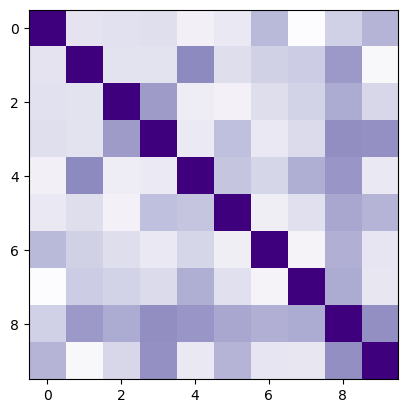

In [27]:
#%%

heat_map = np.zeros((10,10))

for i in range(10):
    for j in range(10):
        heat_map[i][j] = fhrr.similarity(sum_vec[i], sum_vec[j])

import matplotlib.pyplot as plt

plt.imshow(heat_map, cmap='Purples', interpolation='nearest')
plt.show()    

9


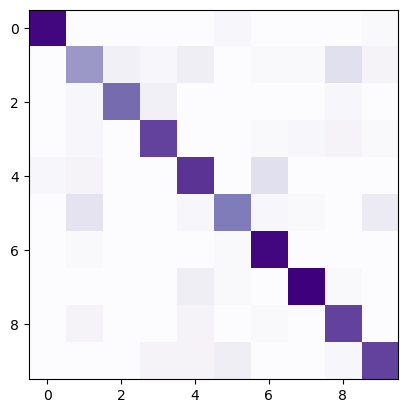

In [28]:
#%%

### Classify

def find_NN(centroids, sample):
    closest = -1
    highest_sim = -1
    for i in range(len(centroids)):
        sim = fhrr.similarity(sample, centroids[i])
        if (sim > highest_sim):
            highest_sim = sim
            closest = i
    
    return closest


print(find_NN(sum_vec, sum_vec[9]))

classification_counts = np.zeros((10,10))

sum_for_each_class = np.zeros(10)

for i in range(len(X_test)):
    classification_counts[y_test[i]][find_NN(sum_vec, X_test[i])] += 1
    sum_for_each_class[y_test[i]] += 1

# for i in range(len(classification_counts)):
    
    

plt.imshow(classification_counts, cmap='Purples', interpolation='nearest')
plt.show()

#%%

In [29]:
## Classification report

predicted = []
for i in range(len(X_test)):
    predicted.append(find_NN(sum_vec, X_test[i]))


print(
    f"Classification report for HD classifier:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for HD classifier:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        45
           1       0.54      0.47      0.50        47
           2       0.88      0.78      0.83        37
           3       0.79      0.79      0.79        43
           4       0.67      0.72      0.69        50
           5       0.75      0.59      0.66        46
           6       0.75      0.95      0.84        44
           7       0.91      0.86      0.89        50
           8       0.67      0.83      0.74        41
           9       0.76      0.72      0.74        47

    accuracy                           0.76       450
   macro avg       0.77      0.77      0.76       450
weighted avg       0.76      0.76      0.76       450




## Compare the summation vectors with SNN implementation

In [9]:
import pickle
filename1 = 'sum_vec'
infile1 = open(filename1,'rb')
sum_vec_snn = pickle.load(infile1)
infile1.close()

In [10]:
for i in range(len(sum_vec)):
    print( fhrr.similarity(sum_vec[i], sum_vec_snn[i]) )

IndexError: list index out of range

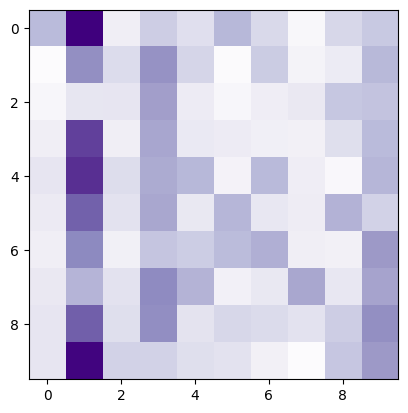

In [10]:
heat_map = np.zeros((10,10))

for i in range(10):
    for j in range(10):
        heat_map[i][j] = fhrr.similarity(sum_vec[i], sum_vec_snn[j])
        
import matplotlib.pyplot as plt

plt.imshow(heat_map, cmap='Purples', interpolation='nearest')
plt.show()  

In [20]:
## Temp
e = 5
steps = 1000
vals = []
vals.append(e)

for i in range(steps):
    vals.append( e + vals[i]/2 )

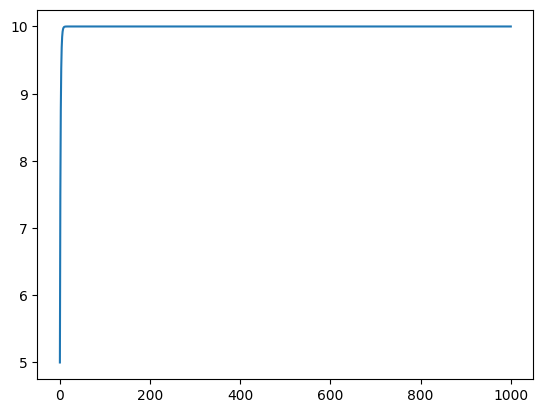

In [21]:
    
plt.plot([i for i in range(len(vals))], vals)